Note:  see the plotting script for plotting column outlet data when changing c

In [15]:
%load_ext autoreload
%autoreload 2

from cadet_imports import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import my_cadet_utils as cad_utils
import parameter_correlations as corr
import exploration_helper as explor

from matplotlib import cm
import gc

In [17]:
results_folder = Path().absolute() / 'sim_results_updated_PREP_2021_changing_c'
image_folder = Path().absolute() / 'images_updated_PREP_2021'

In [18]:
mass = 50

In [19]:
sims = os.listdir(results_folder)
sims.sort()

In [20]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [21]:
# fVolumetric = 1.633e-8/4.0 # m**3/s for reference
v_col = np.pi/4 * (0.5**2) * 1e-4 * 0.042 # [m3]
eps_t = 0.694
eps_c = 0.49

In [9]:
def get_cv_ideal(eps_t, Keq):
    return eps_t + Keq*(1.0 - eps_t)

### t_breakthrough
When c_out/c_feed = 0.01

In [18]:
results = []

for file in sims:
    c_load, this_dp, ka, q_max, kd, keq, t, c_out, fVolum = explor.get_sim_results(results_folder, file, True)
    norm_c = c_out/c_load
    idx = np.searchsorted(norm_c, 0.01, side="left")
    results.append([c_load, keq, t[idx], q_max, this_dp, fVolum])

df = pd.DataFrame(results, columns=['c', 'keq', 't_break', 'q_max', 'dp', 'fVolum'])


In [19]:
df['cv_break'] = df.t_break*df.fVolum/v_col


In [20]:
c_set = list(set(df['c']))
c_set.sort()
c_set.reverse()

q_max = df.at[0, 'q_max']
c_set

[0.2, 0.02, 0.002, 0.0002, 2e-05]

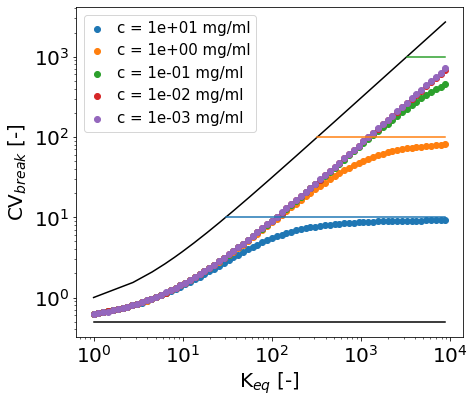

In [21]:
params = {'font.weight':'normal', 'font.size':20, 'figure.autolayout':True}
plt.rcParams.update(params)
fig, ax = plt.subplots()
ax.set_ylabel(r'CV$_{break}$ [-]')
ax.set_xlabel(r'K$_{eq}$ [-]')
ax.set_xscale('log')
ax.set_yscale('log')

fig.patch.set_facecolor('white')
fig.set_size_inches(7, 6, forward=True)

keq_exreme = [min(df['keq']), max(df['keq'])]
keq_vals = np.linspace(keq_exreme[0], keq_exreme[1], 5000)

cv_ideal  = [get_cv_ideal(eps_t, keq) for keq in keq_vals]
cv_min = eps_c

ax.plot(keq_vals, cv_ideal, color='black')
ax.plot(keq_exreme, [cv_min, cv_min], color='black')

for i, c in enumerate(c_set):
    df_temp = df[df['c'] == c].copy()
    df_temp.sort_values(by=['keq'], inplace=True)
    df_temp.reset_index(inplace=True, drop=True)

    ax.scatter(df_temp['keq'], df_temp['cv_break'], label=f'c = {c*mass:.0e} mg/ml')
      
    keq_cross = explor.get_keq_tr_tsat(q_max, c)
    if keq_cross < max(df['keq']):
        cv_sat = explor.get_t_saturation(c, q_max)*fVolum/v_col
        ax.plot([keq_cross, max(df['keq'])], [cv_sat, cv_sat]) # color=plt.gca().lines[-1].get_color()

ax.legend(loc='upper left', frameon=True, handlelength=1.0, fontsize=15)

fig.patch.set_alpha(1)
plt.tight_layout()
# fig.savefig(os.path.join(image_folder, f'cv_break_vs_Keq_0.01_log.png'), dpi=300)

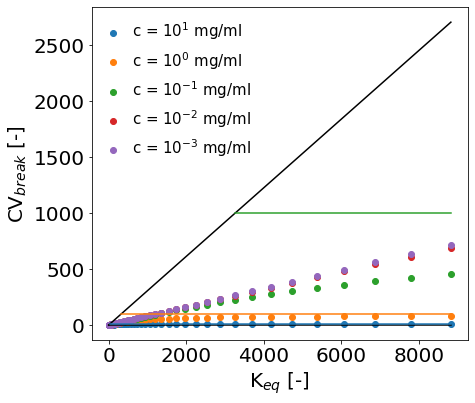

In [30]:
params = {'font.weight':'normal', 'font.size':20, 'figure.autolayout':True}
plt.rcParams.update(params)
fig, ax = plt.subplots()
ax.set_ylabel(r'CV$_{break}$ [-]')
ax.set_xlabel(r'K$_{eq}$ [-]')

# ax.set_ylim(0, 800)

fig.patch.set_facecolor('white')
fig.set_size_inches(7, 6, forward=True)

keq_exreme = [min(df['keq']), max(df['keq'])]
keq_vals = np.linspace(keq_exreme[0], keq_exreme[1], 5000)

cv_ideal  = [get_cv_ideal(eps_t, keq) for keq in keq_vals]
cv_min = eps_c

ax.plot(keq_vals, cv_ideal, color='black')
ax.plot(keq_exreme, [cv_min, cv_min], color='black')

for i, c in enumerate(c_set):
    df_temp = df[df['c'] == c].copy()
    df_temp.sort_values(by=['keq'], inplace=True)
    df_temp.reset_index(inplace=True, drop=True)

    ax.scatter(df_temp['keq'], df_temp['cv_break'], label=fr'c = 10$^{{{np.log10(c*mass):.0f}}}$ mg/ml')
      
    keq_cross = explor.get_keq_tr_tsat(q_max, c)
    if keq_cross < max(df['keq']):
        cv_sat = explor.get_t_saturation(c, q_max)*fVolum/v_col
        ax.plot([keq_cross, max(df['keq'])], [cv_sat, cv_sat]) # color=plt.gca().lines[-1].get_color()

ax.legend(loc='upper left', frameon=False, handlelength=1.0, fontsize=15)

fig.patch.set_alpha(1)
plt.tight_layout()
fig.savefig(os.path.join(image_folder, f'cv_break_vs_Keq_0.01_linear.png'), dpi=300)

### t_breakthrough
When c_out/c_feed = 0.05

In [85]:
results = []

for file in sims:
    c_load, this_dp, ka, q_max, kd, keq, t, c_out, fVolum = explor.get_sim_results(results_folder, file, True)
    norm_c = c_out/c_load
    idx = np.searchsorted(norm_c, 0.5, side="left")
    results.append([c_load, keq, t[idx], q_max, this_dp, fVolum])

df = pd.DataFrame(results, columns=['c', 'keq', 't_break', 'q_max', 'dp', 'fVolum'])


In [86]:
df['cv_break'] = df.t_break*df.fVolum/v_col


In [87]:
c_set = list(set(df['c']))
c_set.sort()
c_set.reverse()

q_max = df.at[0, 'q_max']
c_set

[0.2, 0.02, 0.002, 0.0002, 2e-05]

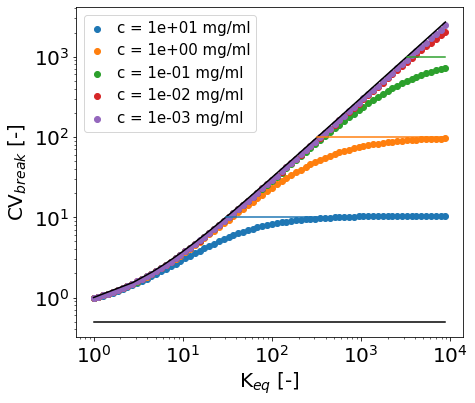

In [88]:
params = {'font.weight':'normal', 'font.size':20, 'figure.autolayout':True}
plt.rcParams.update(params)
fig, ax = plt.subplots()
ax.set_ylabel(r'CV$_{break}$ [-]')
ax.set_xlabel(r'K$_{eq}$ [-]')
ax.set_xscale('log')
ax.set_yscale('log')

fig.patch.set_facecolor('white')
fig.set_size_inches(7, 6, forward=True)

keq_exreme = [min(df['keq']), max(df['keq'])]
keq_vals = np.linspace(keq_exreme[0], keq_exreme[1], 5000)

cv_ideal  = [get_cv_ideal(eps_t, keq) for keq in keq_vals]
cv_min = eps_c

ax.plot(keq_vals, cv_ideal, color='black')
ax.plot(keq_exreme, [cv_min, cv_min], color='black')

for i, c in enumerate(c_set):
    df_temp = df[df['c'] == c].copy()
    df_temp.sort_values(by=['keq'], inplace=True)
    df_temp.reset_index(inplace=True, drop=True)

    ax.scatter(df_temp['keq'], df_temp['cv_break'], label=f'c = {c*mass:.0e} mg/ml')
      
    keq_cross = explor.get_keq_tr_tsat(q_max, c)
    if keq_cross < max(df['keq']):
        cv_sat = explor.get_t_saturation(c, q_max)*fVolum/v_col
        ax.plot([keq_cross, max(df['keq'])], [cv_sat, cv_sat]) # color=plt.gca().lines[-1].get_color()

ax.legend(loc='upper left', frameon=True, handlelength=1.0, fontsize=15)

fig.patch.set_alpha(1)
plt.tight_layout()
fig.savefig(os.path.join(image_folder, f'cv_break_vs_Keq_0.5_log.png'), dpi=300)

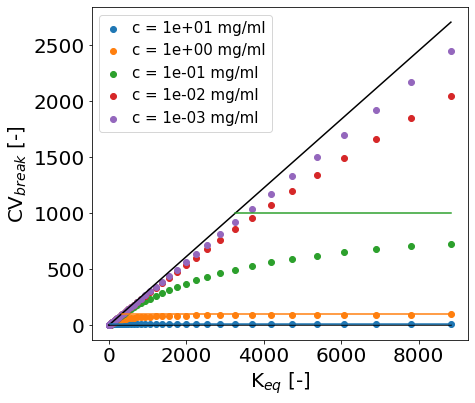

In [90]:
params = {'font.weight':'normal', 'font.size':20, 'figure.autolayout':True}
plt.rcParams.update(params)
fig, ax = plt.subplots()
ax.set_ylabel(r'CV$_{break}$ [-]')
ax.set_xlabel(r'K$_{eq}$ [-]')

# ax.set_ylim(0, 800)

fig.patch.set_facecolor('white')
fig.set_size_inches(7, 6, forward=True)

keq_exreme = [min(df['keq']), max(df['keq'])]
keq_vals = np.linspace(keq_exreme[0], keq_exreme[1], 5000)

cv_ideal  = [get_cv_ideal(eps_t, keq) for keq in keq_vals]
cv_min = eps_c

ax.plot(keq_vals, cv_ideal, color='black')
ax.plot(keq_exreme, [cv_min, cv_min], color='black')

for i, c in enumerate(c_set):
    df_temp = df[df['c'] == c].copy()
    df_temp.sort_values(by=['keq'], inplace=True)
    df_temp.reset_index(inplace=True, drop=True)

    ax.scatter(df_temp['keq'], df_temp['cv_break'], label=f'c = {c*mass:.0e} mg/ml')
      
    keq_cross = explor.get_keq_tr_tsat(q_max, c)
    if keq_cross < max(df['keq']):
        cv_sat = explor.get_t_saturation(c, q_max)*fVolum/v_col
        ax.plot([keq_cross, max(df['keq'])], [cv_sat, cv_sat]) # color=plt.gca().lines[-1].get_color()

ax.legend(loc='upper left', frameon=True, handlelength=1.0, fontsize=15)

fig.patch.set_alpha(1)
plt.tight_layout()
fig.savefig(os.path.join(image_folder, f'cv_break_vs_Keq_0.5_linear.png'), dpi=300)

In [10]:
# results_folder = Path().absolute() / 'sim_results_parameter_exploration'   
# image_folder = Path().absolute() / 'images_updated_PREP_2021'

In [11]:
sims = os.listdir(results_folder)
sims.sort()

files = [i for i in sims if ('2.0e-05' in i)]

In [12]:
v_col = 0.042 * np.pi/4 * (0.5**2) * 1e-4

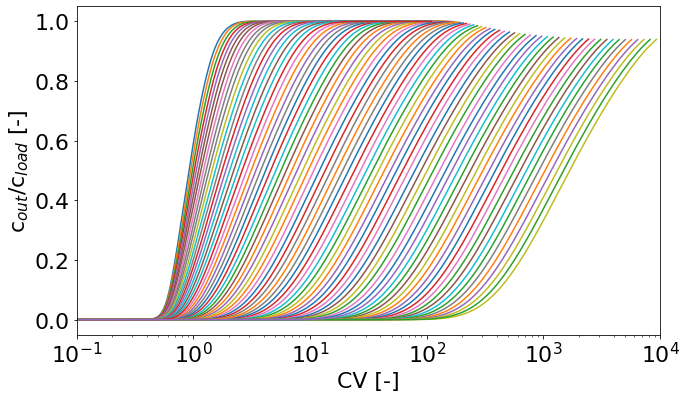

In [14]:
params = {'font.weight':'normal', 'font.size':22, 'figure.autolayout':True}
plt.rcParams.update(params)
fig, ax = plt.subplots()
ax.set_xlabel('CV [-]')
ax.set_ylabel(r'c$_{out}$/c$_{load}$ [-]')

dp = 6.0e-12 # 2e-11 # 
Q = 1.633e-8 #/4.0

for f in files:
    c_load, this_dp, ka, q_max, kd, keq, t, c_out, fVolum, Ds, d_part, l_col =\
    explor.get_sim_results(results_folder, f, True)
    
    if this_dp == dp and fVolum == Q:
        ax.plot(t*fVolum/v_col, c_out/c_load)
    
ax.set_xscale('log')
fig.patch.set_facecolor('white')
fig.set_size_inches(10, 6, forward=True)
ax.set_xlim(0.1, 1e4)

fig.patch.set_alpha(1)
plt.tight_layout()
# fig.savefig(os.path.join(image_folder, f'breakthrough_curves_dp_{dp:.2e}_Q_{Q}.png'), dpi=300)

# fig.clf()
# plt.close()
# gc.collect()

In [9]:
def get_linear_v(Q, D=5.0e-3):
    return Q/(np.pi/4.0*D**2.0)

def get_t_star(t, v_lin, l_col):
    return t*v_lin/l_col

def get_peclet(d_part, v_lin, Dp):
    return d_part*v_lin/Dp

In [10]:
d_part = 5.0e-5
l_col  = 0.042

eps_t = 0.694
up_bnd = (1.0 - eps_t)
up_bnd

eps_c = 0.49

V_col = np.pi/4 * (0.5**2) * 1e-4 * 0.042

In [11]:
results_folder = Path().absolute() / 'sim_results_t_vs_Keq_slope_mapping'
if not os.path.exists( results_folder.as_posix() ):
    os.makedirs( results_folder.as_posix() )
    
sims = os.listdir(results_folder)
sims.sort()

In [12]:
results = []

for file in sims:
    try:
        c_load, this_dp, ka, q_max, kd, keq, t, c_out, fVolum =\
        explor.get_sim_results(results_folder, file, True)
        norm_c = c_out/c_load
        idx = np.searchsorted(norm_c, 0.01, side="left")
        idx2 = np.searchsorted(norm_c, 0.5, side="left")
        results.append([c_load, keq, t[idx], t[idx2], q_max, this_dp, fVolum])
    except:
        pass
    
df = pd.DataFrame(results, columns=['c', 'keq', 't_break_01', 't_break_50', 'q_max', 
                                    'dp', 'fVolum'])

In [13]:
df_lo = df[(df['keq'] > 0.99) & (df['keq'] < 1.01)].copy()
df_hi = df[(df['keq'] > 999) & (df['keq'] < 1001)].copy()
df_lo.reset_index(drop=True, inplace=True)
df_hi.reset_index(drop=True, inplace=True)

In [14]:
results_folder = Path().absolute() / 'sim_results_parameter_exploration'   
sims = os.listdir(results_folder)
sims.sort()

In [15]:
c_val = 2e-5

In [16]:
results = []

for file in sims:
    try:
        c_load, this_dp, ka, q_max, kd, keq, t, c_out, fVolum =\
        explor.get_sim_results(results_folder, file, True)
        if c_load == c_val:
            norm_c = c_out/c_load
            idx = np.searchsorted(norm_c, 0.01, side="left")
            results.append([c_load, keq, t[idx], q_max, this_dp, fVolum])
    except:
        pass
    
df = pd.DataFrame(results, columns=['c', 'keq', 't_break', 'q_max', 'dp', 'fVolum'])

In [17]:
c_set = list(set(df['c']))
c_set.sort()
c_set.reverse()

q_max = df.at[0, 'q_max']

dp_set = list(set(df['dp']))
dp_set.sort()

f_set = list(set(df['fVolum']))
f_set.sort()


In [18]:
df['v_lin'] = get_linear_v(df['fVolum'], D=5.0e-3)
t0 = V_col*eps_c/fVolum
df['t_star'] = get_t_star(df['t_break'], df['v_lin'], l_col)

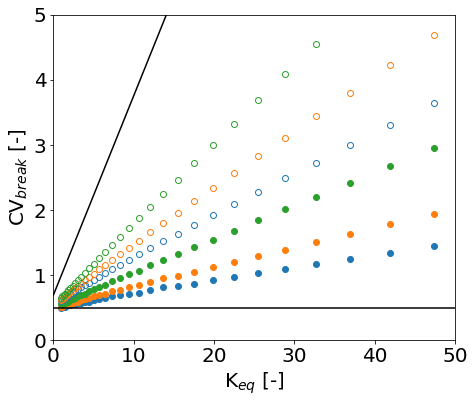

In [20]:
params = {'font.weight':'normal', 'font.size':20, 'figure.autolayout':True}
plt.rcParams.update(params)
fig, ax = plt.subplots()
ax.set_ylabel(r'CV$_{break}$ [-]')
ax.set_xlabel(r'K$_{eq}$ [-]')
fig.patch.set_facecolor('white')
fig.set_size_inches(7, 6, forward=True)

keq_exreme = [0, max(df['keq'])]
keq_vals = np.linspace(keq_exreme[0], keq_exreme[1], 5000)

cv_ideal  = [get_cv_ideal(eps_t, keq) for keq in keq_vals]
cv_min = eps_c

ax.plot(keq_vals, cv_ideal, color='black')
ax.plot(keq_exreme, [cv_min, cv_min], color='black')

for i, dp in enumerate(dp_set):
    df_temp = df[(df['dp'] == dp) & (df['fVolum'] == 1.633e-8)].copy()
    df_temp.sort_values(by=['keq'], inplace=True)
    df_temp.reset_index(inplace=True, drop=True)
    ax.scatter(df_temp['keq'], df_temp['t_star'], label=f'D$_p$ = {dp:.0e} m$^2$/s, u = 300 cm/h')

    
    df_temp = df[(df['dp'] == dp) & (df['fVolum'] == 1.633e-8/4.0)].copy()
    df_temp.sort_values(by=['keq'], inplace=True)
    df_temp.reset_index(inplace=True, drop=True)
    ax.plot(df_temp['keq'], df_temp['t_star'], 'o', fillstyle='none', color=colors[i], label=f'D$_p$ = {dp:.0e} m$^2$/s, u = 75 cm/h')

    
    keq_cross = explor.get_keq_tr_tsat(q_max, c_val)
    if keq_cross < max(df['keq']):
        t_sat = explor.get_t_saturation(c, q_max)
        ax.plot([keq_cross, max(df['keq'])], [t_sat, t_sat]) # color=plt.gca().lines[-1].get_color()

# ax.legend(loc='upper left', frameon=True, handlelength=1.0, fontsize=13)
ax.set_ylim(0, 5)
ax.set_xlim(0, 50)
# ax.set_ylim(0, 2000)
# ax.set_xlim(0, None)

fig.patch.set_alpha(1)
plt.tight_layout()
fig.savefig(os.path.join('./images_updated_PREP_2021', f'cv_break_vs_Keq_transport_zoomed.png'), dpi=300)